In [1]:
import pandas as pd
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

import numpy as np
import matplotlib.pyplot as plt

plt.gcf().subplots_adjust(bottom=0.15)

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
movie_credit_file = './tmdb-5000-movie-dataset/tmdb_5000_credits.csv'
movie_file = './tmdb-5000-movie-dataset/tmdb_5000_movies.csv'

df_credit_file = pd.read_csv(movie_credit_file)
df_movie_file = pd.read_csv(movie_file)

In [4]:
#rename columns for subsequent merge
df_credit_file = df_credit_file.rename(columns = {'movie_id': 'id', 'title': 'original_title', 'cast':'cast', 'crew':'crew'})

#merge
df_merged = df_movie_file.merge(df_movie_file, how='left', on = 'original_title' )

#columns relevant for downloading images
df_data_download = df_merged[['id_x','original_title']]

In [5]:
df_credit_file.columns

Index(['id', 'original_title', 'cast', 'crew'], dtype='object')

In [6]:
#elimate the entries below minBudget. We don't know if the $0 budgets are missing values or mistakes, 
#so for now we're leaving them out

minBudget = 10000

df_dropped_minBudgets = df_merged.loc[df_merged['budget_x'] > minBudget]

print(len(df_merged))
print(len(df_dropped_minBudgets))
print('Number of entries eliminated: %s' % (len(df_merged)-len(df_dropped_minBudgets)))

4807
3732
Number of entries eliminated: 1075


Text(0,0.5,'Number of entries')

/Users/CamilleIP/anaconda/envs/py3k/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


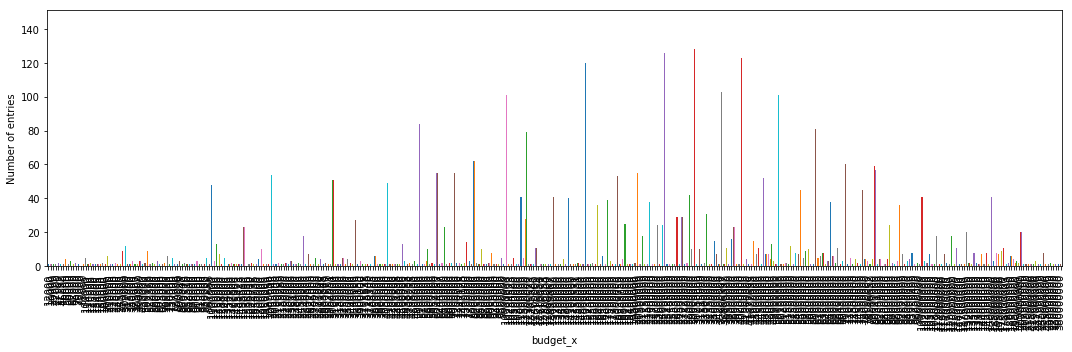

In [7]:
#the following is to visualize the distribution of the budget values


#to visualize
df_budget = df_dropped_minBudgets.groupby(['budget_x']).count()
df_budget.plot(kind='bar', legend=False, figsize=(15,5))
plt.ylabel('Number of entries')


In [8]:
#to get statistics about the budget values

df_dropped_minBudgets = df_dropped_minBudgets.sort_values(by=['budget_x'])

percentiles = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
descriptives = df_dropped_minBudgets.budget_x.describe(percentiles=percentiles)

descriptives

count    3.732000e+03
mean     3.739005e+07
std      4.268819e+07
min      1.200000e+04
0%       1.200000e+04
10%      2.600000e+06
20%      6.400000e+06
30%      1.100000e+07
40%      1.650000e+07
50%      2.400000e+07
60%      3.000000e+07
70%      4.000000e+07
80%      6.000000e+07
90%      9.000000e+07
100%     3.800000e+08
max      3.800000e+08
Name: budget_x, dtype: float64

In [9]:
#to make bins and labels that correspond to the percentages in "descriptives"

bins = descriptives.values[4:15]
labels = np.arange(0,10)

bins[0] =0

print(len(labels))
print(len(bins))

10
11


In [10]:
#####df_budgets is the dataframe with budgetlabels and only includes entries with budgets > minBudget

df_dropped_minBudgets['budget_labels'] = pd.cut(df_dropped_minBudgets['budget_x'], bins=bins, labels=labels)

df_budgets = df_dropped_minBudgets[['budget_x', 'id_x', 'original_title', 'budget_labels']]

In [11]:
# The following is used to vectorize the genres. 


###NOTE: by using the following command, we are using the full dataset again,
###and INCLUDING entries with budgets < minBudget

df_genres = df_merged[['original_title', 'id_x', 'genres_x']]

##### Use this command if you want to make sure we're looking at the 
#### same entries as in df_budgets. i.e. EXCLUDING entries with budgets < minBudget

# df_genres = df_dropped_minBudgets[['original_title', 'id_x', 'genres_x']]

In [12]:
df_genres.head()

,original_title,id_x,genres_x
0,Avatar,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,Pirates of the Caribbean: At World's End,285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,Spectre,206647,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,The Dark Knight Rises,49026,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,John Carter,49529,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


In [13]:
#We hand picked these genres to featurize to 0/1 entries
df_genres['Action'] = (df_genres['genres_x'].str.contains('Action'))*1
df_genres['Thriller'] = (df_genres['genres_x'].str.contains('Thriller'))*1
df_genres['Adventure'] = (df_genres['genres_x'].str.contains('Adventure'))*1
df_genres['Animation'] = (df_genres['genres_x'].str.contains('Animation'))*1
df_genres['Western'] = (df_genres['genres_x'].str.contains('Western'))*1
df_genres['Comedy'] = (df_genres['genres_x'].str.contains('Comedy'))*1
df_genres['Crime'] = (df_genres['genres_x'].str.contains('Crime'))*1
df_genres['Drama'] = (df_genres['genres_x'].str.contains('Drama'))*1
df_genres['Horror'] = (df_genres['genres_x'].str.contains('Horror'))*1
df_genres['Romantic comedy'] = (df_genres['genres_x'].str.contains('Romance') & df_genres['genres_x'].str.contains('Comedy'))*1


#This provides a count of each genre
df_totals = np.sum(df_genres[df_genres.columns[3:]])
df_totals

/Users/CamilleIP/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/CamilleIP/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/CamilleIP/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

Action             1155
Thriller           1274
Adventure           791
Animation           234
Western              82
Comedy             1723
Crime               697
Drama              2299
Horror              519
Romantic comedy     484
dtype: int64

In [14]:
df_genres.head()

,original_title,id_x,genres_x,Action,Thriller,Adventure,Animation,Western,Comedy,Crime,Drama,Horror,Romantic comedy
0,Avatar,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",1,0,1,0,0,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",1,0,1,0,0,0,0,0,0,0
2,Spectre,206647,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",1,0,1,0,0,0,1,0,0,0
3,The Dark Knight Rises,49026,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",1,1,0,0,0,0,1,1,0,0
4,John Carter,49529,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",1,0,1,0,0,0,0,0,0,0
